In [1]:
# # # Generate 400 random numbers between 1000 and 15000
# # income = np.random.randint(1000, 15001, size=400)
# # # Print the income values
# # print(income)

# import pandas as pd
# # Read the XLSX file into a DataFrame
# df = pd.read_excel('output.xlsx')

# # Work with the data in the DataFrame
# print(df.head())  # Display the first few rows of the DataFrame


# # Read the CSV file into a DataFrame
# # df = pd.read_csv('C:\Users\Enwin Anson\rfm analysis\budget\output.csv')
# # df['Date'] = df['Date'].str.replace('/', '-')

# # Now, you can work with the data using Pandas DataFrame operations
# print(df)


In [7]:
# import pandas as pd

# # Assuming 'df' is your DataFrame
# income_df = df[df['Income/Expense'] == 'Income']  # Filter rows with 'Income'
# expense_df = df[df['Income/Expense'] == 'Expense']  # Filter rows with 'Expense'

# # Reset index for the new DataFrames if needed
# income_df.reset_index(drop=True, inplace=True)
# expense_df.reset_index(drop=True, inplace=True)

# # Print or work with the new DataFrames as needed
# print("Income DataFrame:")
# print(income_df)

# print("Expense DataFrame:")
# print(expense_df)


In [19]:
# expense_df.to_excel('expense.xlsx', index=False)

In [10]:
# !pip install openpyxl
# 

In [30]:
import pandas as pd

# Read the expenses and income data from separate sheets
expense_df = pd.read_excel('expense.xlsx')
income_df = pd.read_excel('income.xlsx')

print("Income DataFrame:")
print(income_df)

print("Expense DataFrame:")
print(expense_df)

Income DataFrame:
                Date               Account    Category   
0     03-01-22 18:22  CUB - online payment       Other  \
1     03-01-22 18:21  CUB - online payment       Other   
2    2-28-2022 11:45  CUB - online payment       Other   
3    2-26-2022 17:37  CUB - online payment       Other   
4     02-12-22 14:47  CUB - online payment       Other   
5     02-08-22 10:37  CUB - online payment       Other   
6     02-06-22 16:41  CUB - online payment       Other   
7     02-02-22 20:14  CUB - online payment       Other   
8    1-27-2022 13:38  CUB - online payment       Other   
9    1-27-2022 13:38  CUB - online payment       Other   
10   1-26-2022 17:45  CUB - online payment       Other   
11   1-23-2022 21:29  CUB - online payment       Other   
12   1-23-2022 21:27  CUB - online payment       Other   
13   1-21-2022 11:47  CUB - online payment       Other   
14   1-18-2022 12:59  CUB - online payment       Other   
15   1-15-2022 21:16  CUB - online payment       Other

In [31]:
# # Transform and create 'YearMonth' column for expenses
# expense_df['YearMonth'] = pd.to_datetime(expense_df['Date']).dt.to_period('M')

# # expenses_df['YearMonth'] = pd.to_datetime(expenses_df['Date'], format='%d-%m-%y %H:%M').dt.to_period('M')


# # Transform and create 'YearMonth' column for income
# income_df['YearMonth'] = pd.to_datetime(income_df['Date']).dt.to_period('M')
# Specify the date format for parsing the 'Date' column
expense_df['YearMonth'] = pd.to_datetime(expense_df['Date']).dt.to_period('M')
income_df['YearMonth'] = pd.to_datetime(income_df['Date']).dt.to_period('M')



C:\Users\Enwin Anson\AppData\Local\Temp\ipykernel_14988\3828543013.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  expense_df['YearMonth'] = pd.to_datetime(expense_df['Date']).dt.to_period('M')
C:\Users\Enwin Anson\AppData\Local\Temp\ipykernel_14988\3828543013.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  income_df['YearMonth'] = pd.to_datetime(income_df['Date']).dt.to_period('M')


In [32]:
monthly_expense = expense_df.groupby('YearMonth').agg({'Amount': 'sum'}).reset_index()
monthly_income = income_df.groupby('YearMonth').agg({'Income': 'sum'}).reset_index()
monthly_data = pd.concat([monthly_income, monthly_expense], axis=1)

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Read the expenses and income data from separate sheets
expense_df = pd.read_excel('expense.xlsx')
income_df = pd.read_excel('income.xlsx')

# Convert Date columns to YearMonth
expense_df['YearMonth'] = pd.to_datetime(expense_df['Date']).dt.to_period('M')
income_df['YearMonth'] = pd.to_datetime(income_df['Date']).dt.to_period('M')

# Aggregate monthly income and expenses
monthly_expense = expense_df.groupby('YearMonth').agg({'Amount': 'sum'}).reset_index()
monthly_income = income_df.groupby('YearMonth').agg({'Income': 'sum'}).reset_index()

# Merge the monthly income and expense data into a single DataFrame
monthly_data = pd.concat([monthly_income, monthly_expense], axis=1)

# Prepare the data for linear regression
X = monthly_data['Income'].values.reshape(-1, 1)  # Predictor variable (Income)
y = monthly_data['Amount'].values  # Target variable (Expense)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

# Use the model to predict expenses based on income
predicted_expenses = model.predict(X)

# Add the predicted expenses to the DataFrame
monthly_data['Predicted_Expense'] = predicted_expenses

# Display the results
print("Monthly Data with Predicted Expenses:")
print(monthly_data)


Mean Squared Error: 7821125.680833645
R-squared (R2) Score: nan
Monthly Data with Predicted Expenses:
  YearMonth  Income YearMonth    Amount  Predicted_Expense
0   2021-11    4003   2021-11   3620.40        3828.297147
1   2021-12   12310   2021-12  15228.72       12432.092445
2   2022-01   19641   2022-01  20679.51       20025.016886
3   2022-02   18200   2022-02  17864.65       18532.532352
4   2022-03     600   2022-03    525.00         303.713615


C:\Users\Enwin Anson\AppData\Local\Temp\ipykernel_14988\2856922399.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  expense_df['YearMonth'] = pd.to_datetime(expense_df['Date']).dt.to_period('M')
C:\Users\Enwin Anson\AppData\Local\Temp\ipykernel_14988\2856922399.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  income_df['YearMonth'] = pd.to_datetime(income_df['Date']).dt.to_period('M')
C:\Users\Enwin Anson\anaconda3\envs\rfm_analysis\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\Users\Enwin Anson\AppData\Local\Temp\ipykernel_14988\2661040554.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  expense_df['YearMonth'] = pd.to_datetime(expense_df['Date']).dt.to_period('M')
C:\Users\Enwin Anson\AppData\Local\Temp\ipykernel_14988\2661040554.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  income_df['YearMonth'] = pd.to_datetime(income_df['Date']).dt.to_period('M')


3
3
Mean Squared Error: 4230994.830128515
R-squared (R2) Score: 0.941606975628136
Monthly Data with Predicted Expenses:
  YearMonth  Income YearMonth   Expense  Predicted_Expense
0   2021-11    4003   2021-11   3620.40        3620.400000
1   2021-12   12310   2021-12  15228.72       11955.047091
2   2022-01   19641   2022-01  20679.51       19310.445890
3   2022-02   18200   2022-02  17864.65       17864.650000
4   2022-03     600   2022-03    525.00         206.074245


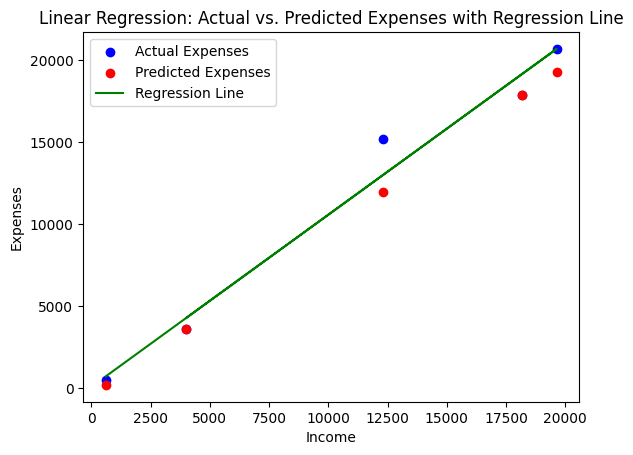

In [35]:
#this is the linear regression model built and graph that shows the expense to income


import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Read the expenses and income data from separate sheets
expense_df = pd.read_excel('expense.xlsx')
income_df = pd.read_excel('income.xlsx')

# Convert Date columns to YearMonth
expense_df['YearMonth'] = pd.to_datetime(expense_df['Date']).dt.to_period('M')
income_df['YearMonth'] = pd.to_datetime(income_df['Date']).dt.to_period('M')

# Aggregate monthly income and expenses
monthly_expense = expense_df.groupby('YearMonth').agg({'Expense': 'sum'}).reset_index()
monthly_income = income_df.groupby('YearMonth').agg({'Income': 'sum'}).reset_index()

# Merge the monthly income and expense data into a single DataFrame
monthly_data = pd.concat([monthly_income, monthly_expense], axis=1)

# Prepare the data for linear regression
X = monthly_data['Income'].values.reshape(-1, 1)  # Predictor variable (Income)
y = monthly_data['Expense'].values  # Target variable (Expense)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

print(len(y_pred))
print(len(y_test))
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

# Use the model to predict expenses based on income
predicted_expenses = model.predict(X)

# Add the predicted expenses to the DataFrame
monthly_data['Predicted_Expense'] = predicted_expenses

# Display the results
print("Monthly Data with Predicted Expenses:")
print(monthly_data)


import numpy as np
import matplotlib.pyplot as plt

# Your data (example data)
income = monthly_data['Income']
actual_expenses = monthly_data['Expense']
predicted_expenses = monthly_data['Predicted_Expense']

# Fit a linear regression line
regression_line = np.polyfit(income, actual_expenses, 1)
slope, intercept = regression_line




# Create a scatter plot
plt.scatter(income, actual_expenses, label='Actual Expenses', color='blue')
plt.scatter(income, predicted_expenses, label='Predicted Expenses', color='red')
plt.plot(income, slope * income + intercept, color='green', label='Regression Line')

plt.xlabel('Income')
plt.ylabel('Expenses')
plt.legend()
plt.title('Linear Regression: Actual vs. Predicted Expenses with Regression Line')
plt.show()


C:\Users\Enwin Anson\AppData\Local\Temp\ipykernel_14988\4231524547.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  expense_df['YearMonth'] = pd.to_datetime(expense_df['Date']).dt.to_period('M')
C:\Users\Enwin Anson\AppData\Local\Temp\ipykernel_14988\4231524547.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  income_df['YearMonth'] = pd.to_datetime(income_df['Date']).dt.to_period('M')


Mean Squared Error: 4230994.830128515
R-squared (R2) Score: 0.941606975628136
Monthly Data with Predicted Expenses:
  YearMonth  Income YearMonth   Expense  Predicted_Expense
0   2021-11    4003   2021-11   3620.40        3620.400000
1   2021-12   12310   2021-12  15228.72       11955.047091
2   2022-01   19641   2022-01  20679.51       19310.445890
3   2022-02   18200   2022-02  17864.65       17864.650000
4   2022-03     600   2022-03    525.00         206.074245


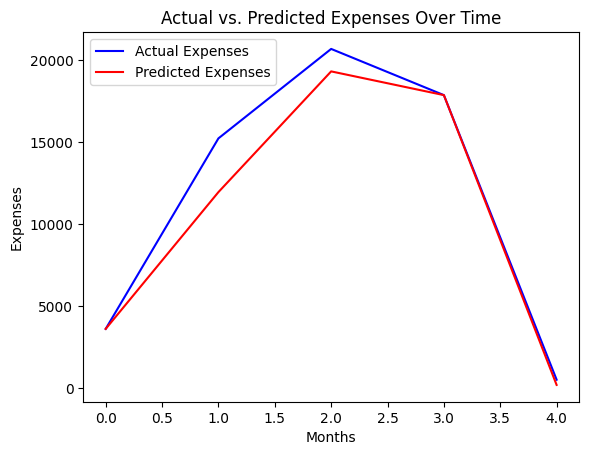

In [37]:
#this is the linear regression implemented along with the graph of month to expense 

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Read the expenses and income data from separate sheets
expense_df = pd.read_excel('expense.xlsx')
income_df = pd.read_excel('income.xlsx')

# Convert Date columns to YearMonth
expense_df['YearMonth'] = pd.to_datetime(expense_df['Date']).dt.to_period('M')
income_df['YearMonth'] = pd.to_datetime(income_df['Date']).dt.to_period('M')

# Aggregate monthly income and expenses
monthly_expense = expense_df.groupby('YearMonth').agg({'Expense': 'sum'}).reset_index()
monthly_income = income_df.groupby('YearMonth').agg({'Income': 'sum'}).reset_index()

# Merge the monthly income and expense data into a single DataFrame
monthly_data = pd.concat([monthly_income, monthly_expense], axis=1)

# Prepare the data for linear regression
X = monthly_data['Income'].values.reshape(-1, 1)  # Predictor variable (Income)
y = monthly_data['Expense'].values  # Target variable (Expense)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

# Use the model to predict expenses based on income
predicted_expenses = model.predict(X)

# Add the predicted expenses to the DataFrame
monthly_data['Predicted_Expense'] = predicted_expenses

# Display the results
print("Monthly Data with Predicted Expenses:")
print(monthly_data)

# Create a line plot for actual vs. predicted expenses over time
months = range(len(monthly_data))  # Using integer values as x-coordinates
actual_expenses = monthly_data['Expense']
predicted_expenses = monthly_data['Predicted_Expense']

plt.plot(months, actual_expenses, label='Actual Expenses', color='blue')
plt.plot(months, predicted_expenses, label='Predicted Expenses', color='red')

plt.xlabel('Months')
plt.ylabel('Expenses')
plt.legend()
plt.title('Actual vs. Predicted Expenses Over Time')
plt.show()


Mean Squared Error: 746271.940143461
R-squared (R2) Score: 0.988382314134571


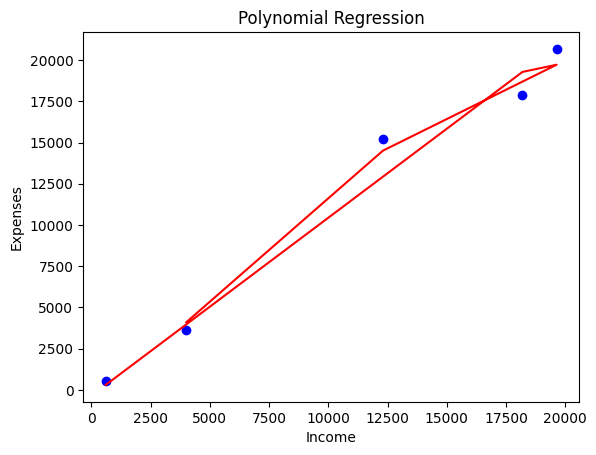

In [25]:
#this is the polynomial regression implemented


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'monthly_data' contains your data
X = monthly_data['Income'].values.reshape(-1, 1)
y = monthly_data['Expense'].values

# Choose the polynomial degree (e.g., 2 for quadratic)
degree = 3

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predict using the model
y_pred = poly_reg.predict(X_poly)

# Model evaluation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

# Visualization
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Polynomial Regression')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.show()
